<a href="https://colab.research.google.com/github/DEBORA-PERSICH/DOT_ATIVIDADES_2021/blob/main/2_0_Atividade_RASTER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# RUN - no questions asked!
!apt-get install -qq curl g++ make
!curl -L http://download.osgeo.org/libspatialindex/spatialindex-src-1.8.5.tar.gz | tar xz

import os
os.chdir('spatialindex-src-1.8.5')

!./configure
!make
!make install

!pip install rtree
!ldconfig

In [ ]:
# install necessary packages
!pip install geopandas
!pip install mapclassify
!pip install earthpy
!pip install rioxarray
!pip install os
!pip install numpy
!pip install matplotlib
!pip install seaborn

!pip install shapely.geometry
!pip install pandas
!pip install earthpy
!pip install rasterio
!pip install glob



In [4]:
# Import libraries

import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib.colors import ListedColormap
import seaborn as sns
from shapely.geometry import box
import geopandas as gpd
import earthpy as et
import pandas as pd
import rioxarray as rxr
import rasterio as rio
from rasterio.plot import plotting_extent
import earthpy.plot as ep
from glob import glob
import earthpy.spatial as es

# Adjust plot font sizes
sns.set(font_scale=1.5)
sns.set_style("white")

# Get data and set working directory
et.data.get_data('cold-springs-fire')
os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))



Extracted output to /root/earth-analytics/data/cold-springs-fire/.


# Challenge 1: **Open And Plot** **Hillshade**

In [5]:
#OPEN DATA
#   - RESPOSTA 01
lidar_dtm = os.path.join('/content/drive/MyDrive/DOT/AULAS/COLAB/colorado-flood/spatial/boulder-leehill-rd/pre-flood/lidar/pre_DTM_hill.tif')
with rio.open(lidar_dtm) as dtmhill_src:
  lidar_dtm_01 = dtmhill_src.read(1, masked = True)



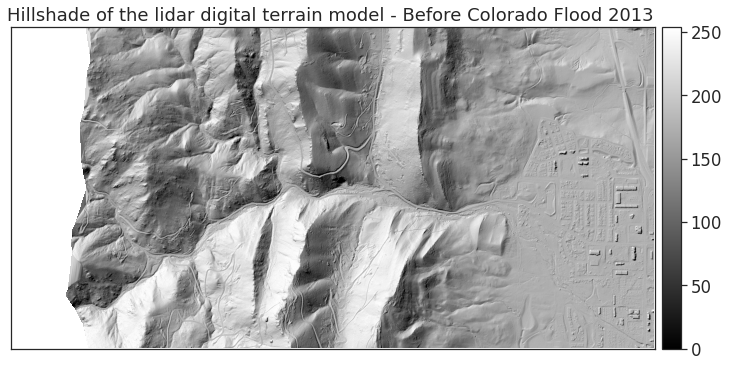

In [6]:
#resposta .02 e 03
#PLOT01
titles = ["Hillshade of the lidar digital terrain model - Before Colorado Flood 2013 "]

# sphinx_gallery_thumbnail_number = 1
ep.plot_bands(lidar_dtm_01, title=titles,
              cmap="gray")
plt.show()

# **Challenge 2: Overlay DTM Over DTM Hillshade**

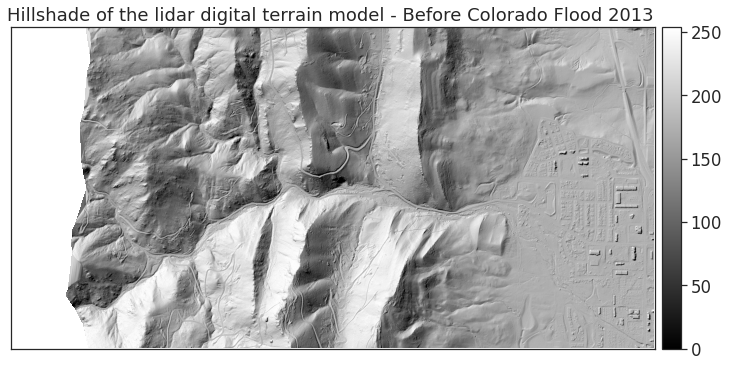

In [7]:
# - RESPOSTA 01 (Plot the hillshade - pre_DTM_hill.tif)

titles = ["Hillshade of the lidar digital terrain model - Before Colorado Flood 2013 "]

# sphinx_gallery_thumbnail_number = 1
ep.plot_bands(lidar_dtm_01, title=titles,
              cmap="gray")
plt.show()


In [8]:
# import arquivos 02 
dtm_pre_path = os.path.join('/content/drive/MyDrive/DOT/AULAS/COLAB/colorado-flood/spatial/boulder-leehill-rd/pre-flood/lidar/pre_DTM.tif')
with rio.open(dtm_pre_path) as dtm02_src:
 dtm_pre_arr = dtm02_src.read(1, masked = True)


lidar_dtm = os.path.join('/content/drive/MyDrive/DOT/AULAS/COLAB/colorado-flood/spatial/boulder-leehill-rd/pre-flood/lidar/pre_DTM_hill.tif')
with rio.open(lidar_dtm) as dtmhill_src:
  lidar_dtm_01 = dtmhill_src.read(1, masked = True)

lidar_dtm_01

masked_array(
  data=[[--, --, --, ..., --, --, --],
        [--, --, --, ..., 170, 164, --],
        [--, --, --, ..., 163, 160, --],
        ...,
        [--, --, --, ..., 187, 186, --],
        [--, --, --, ..., 186, 192, --],
        [--, --, --, ..., --, --, --]],
  mask=[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ..., False, False,  True],
        [ True,  True,  True, ..., False, False,  True],
        ...,
        [ True,  True,  True, ..., False, False,  True],
        [ True,  True,  True, ..., False, False,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=255,
  dtype=uint8)

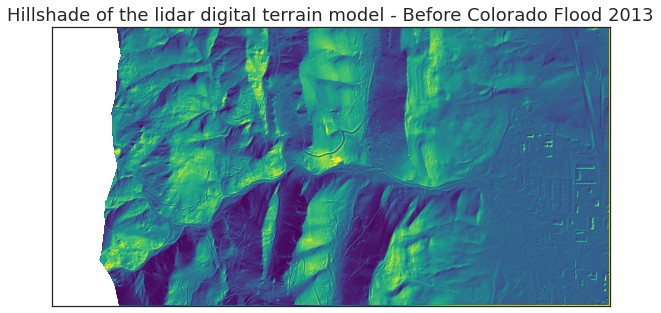

In [9]:
# - RESPOSTA 02 (O DTM que eu abri ↑,  ENCIMA do dtm_pre_arr)


fig, ax = plt.subplots(figsize=(10, 6))

ep.plot_bands(dtm_pre_arr, 
              cmap='viridis_r', 
              #alpha= 1, 
              cbar= False,
              ax=ax)
              


ep.plot_bands(lidar_dtm_01, 
              ax=ax, 
              alpha= 1,
              cbar= False, 
              cmap='viridis_r',
              title="Hillshade of the lidar digital terrain model - Before Colorado Flood 2013")

#**Challenge 3: Add A Site Boundary to Your Raster Plot**



In [10]:

#IMPORT SHP

site_bound_path =os.path.join("/content/drive/MyDrive/DOT/AULAS/COLAB/colorado-flood/spatial/boulder-leehill-rd/clip-extent.shp")
site_bound_shp = gpd.read_file(site_bound_path)

# import DTM tif (de novo)
dtm_pre_path = os.path.join('/content/drive/MyDrive/DOT/AULAS/COLAB/colorado-flood/spatial/boulder-leehill-rd/pre-flood/lidar/pre_DTM.tif')
with rio.open(dtm_pre_path) as dtm02_src:
 dtm_pre_arr = dtm02_src.read(1, masked = True)
 dtm_pre_arr_extent = plotting_extent(dtm02_src)


#import DTM hill tif (de novo)
lidar_dtm = os.path.join('/content/drive/MyDrive/DOT/AULAS/COLAB/colorado-flood/spatial/boulder-leehill-rd/pre-flood/lidar/pre_DTM_hill.tif')
with rio.open(lidar_dtm) as dtmhill_src:
  lidar_dtm_01 = dtmhill_src.read(1, masked = True)
  lidar_dtm_extent = plotting_extent(dtmhill_src)  
lidar_dtm_extent  


(472000.0, 476000.0, 4434000.0, 4436000.0)

In [11]:
print(dtm02_src.crs)
print(dtmhill_src.crs)
print(site_bound_shp.crs)


EPSG:32613
EPSG:32613
epsg:32613


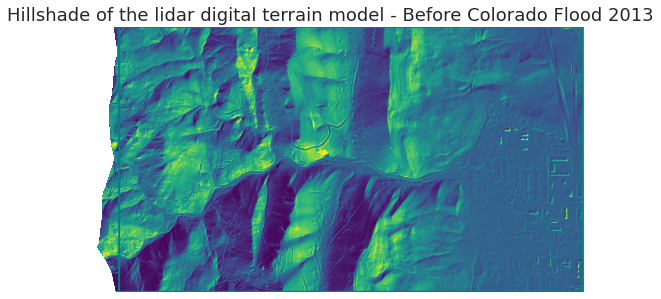

In [12]:

#RESPOSTA.02 - 
fig, ax = plt.subplots(figsize=(10, 6))



ep.plot_bands(dtm_pre_arr, 
              cmap='viridis_r', 
               ax=ax, 
              #alpha= 1,
              cbar=False,
              extent = dtm_pre_arr_extent)

ep.plot_bands(lidar_dtm_01, 
              cmap='viridis_r', 
              alpha= 1,
              ax=ax, 
              cbar=False ,
              title="Hillshade of the lidar digital terrain model - Before Colorado Flood 2013",
              extent =lidar_dtm_extent  )

          # shapefile - plot
site_bound_shp.plot(color='None',
                    edgecolor='teal',
                    linewidth=2,
                    ax=ax)


  
ax.set_axis_off()

plt.show()



# **Challenge 4: Open Post Flood Raster**

In [13]:
#OPEN POST FLOOD DATA post_DTM.tif
post_flood_data = os.path.join('/content/drive/MyDrive/DOT/AULAS/COLAB/colorado-flood/spatial/boulder-leehill-rd/post-flood/lidar/post_DTM.tif')
with rio.open(post_flood_data) as post_src:
  post_flood = post_src.read(1, masked = True)
  post_flood_extent = plotting_extent(post_src) 
post_flood_extent


(472000.0, 476000.0, 4434000.0, 4436000.0)

In [14]:
#OPEN POST FLOOD DATA post_DTM.hill_tif
post_flood_hill_data = os.path.join('/content/drive/MyDrive/DOT/AULAS/COLAB/colorado-flood/spatial/boulder-leehill-rd/post-flood/lidar/post_DTM_Hill.tif')
with rio.open(post_flood_hill_data) as post_hill_src:
  post_hill_flood = post_hill_src.read(1, masked = True)
  post_hill_flood_extent = plotting_extent(post_hill_src) 
post_hill_flood_extent

(472000.0, 476000.0, 4434000.0, 4436000.0)

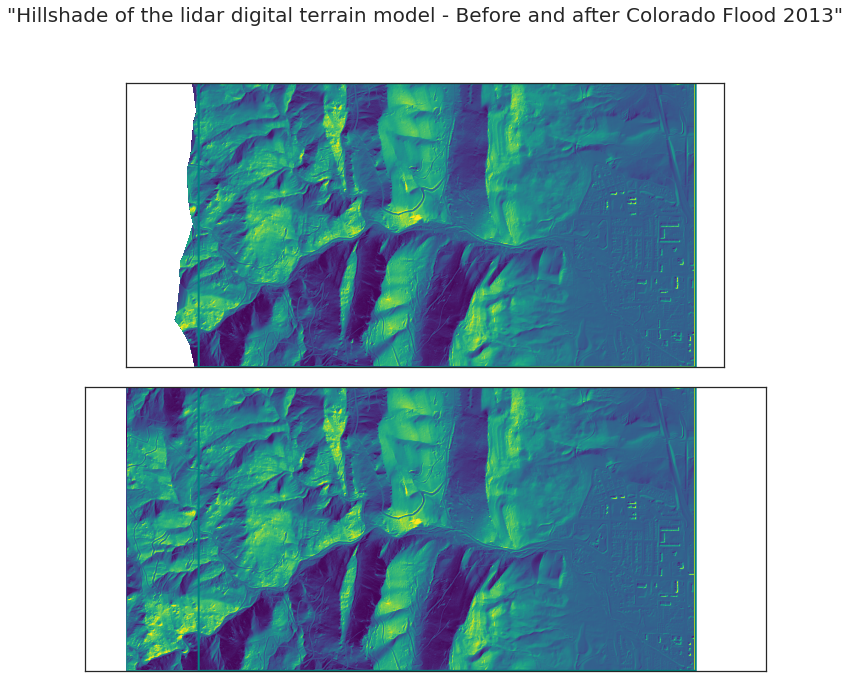

In [15]:
#PLOT - Resposta challenger 04
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

ep.plot_bands(dtm_pre_arr, 
              cmap='viridis_r', 
               ax=ax1, 
              #alpha= 1,
              cbar=False,
              extent = dtm_pre_arr_extent)

ep.plot_bands(lidar_dtm_01, 
              cmap='viridis_r', 
              alpha= 1,
              ax=ax1, 
              cbar=False ,
              extent =lidar_dtm_extent)
              
          # shapefile - plot
site_bound_shp.plot(color='None',
                    edgecolor='teal',
                    linewidth=2,
                    ax=ax1)

ep.plot_bands(post_flood, 
              cmap='viridis_r', 
               ax=ax2, 
              #alpha= 1,
              cbar=False,
              extent = post_flood_extent)

ep.plot_bands(post_hill_flood, 
              cmap='viridis_r', 
              alpha= 1,
              ax=ax2, 
              cbar=False ,
              extent =post_hill_flood_extent )
              

          # shapefile - plot
site_bound_shp.plot(color='None',
                    edgecolor='teal',
                    linewidth=2,
                    ax=ax2)

plt.suptitle('"Hillshade of the lidar digital terrain model - Before and after Colorado Flood 2013"', fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.9])

plt.axis('equal')
plt.show()


# **Challenge 5: plot the GeoTIFF you created**

1.0: O CRS está correto.

In [16]:
lidar_chm_pre_path = ('/content/drive/MyDrive/DOT/AULAS/COLAB/colorado-flood/output_colab/pre-flood-chm.tif')
lidar_chm_pre = rxr.open_rasterio(lidar_chm_pre_path)


In [17]:
print('The CRS is:',lidar_chm_pre.rio.crs)
print('The resolutions is',lidar_chm_pre.rio.resolution)


The CRS is: EPSG:32613
The resolutions is <bound method XRasterBase.resolution of <rioxarray.raster_array.RasterArray object at 0x7f932bd59910>>


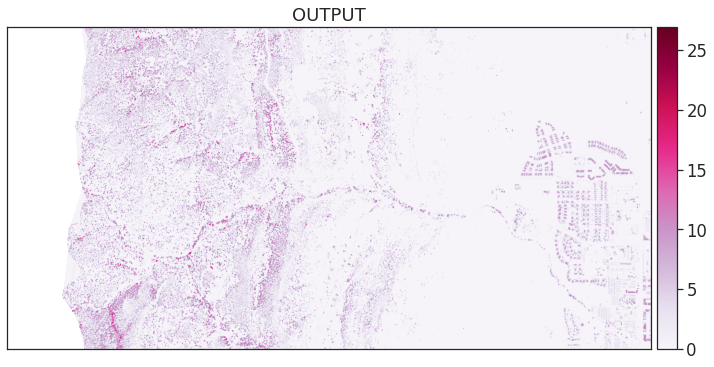

In [18]:
#PLOT

# Plot data 
ep.plot_bands(lidar_chm_pre,
              title="OUTPUT",
              cmap="PuRd")

plt.show()

# **Challenge 6: Plot Change Over Time**

In [19]:
import xarray as xr
from matplotlib.colors import ListedColormap, BoundaryNorm
import earthpy.plot as ep

1º Criação de um CHM com os arquivos de pos flood

In [23]:
#CRIANDO CHM POST
#IMPORT DTM (DEM) POST 
lidar_dem_path2 = os.path.join("/content/drive/MyDrive/DOT/AULAS/COLAB/colorado-flood/spatial/boulder-leehill-rd/post-flood/lidar/post_DTM.tif")

# Open lidar dem renomeado
dem_pos = rxr.open_rasterio(lidar_dem_path2, masked=True).squeeze()
print(dem_pos.shape)
print()
dem_pos

(2000, 4000)



<xarray.DataArray (y: 2000, x: 4000)>
[8000000 values with dtype=float32]
Coordinates:
    band         int64 1
  * x            (x) float64 4.72e+05 4.72e+05 4.72e+05 ... 4.76e+05 4.76e+05
  * y            (y) float64 4.436e+06 4.436e+06 ... 4.434e+06 4.434e+06
    spatial_ref  int64 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0

In [24]:
#IMPORT DSM POST
lidar_dsm_path2 = os.path.join("/content/drive/MyDrive/DOT/AULAS/COLAB/colorado-flood/spatial/boulder-leehill-rd/post-flood/lidar/post_DSM.tif")

#dsm renomeado
dsm_pos = rxr.open_rasterio(lidar_dsm_path2, masked=True).squeeze()
print(dsm_pos.shape)
print()
dsm_pos

(2000, 4000)



<xarray.DataArray (y: 2000, x: 4000)>
[8000000 values with dtype=float32]
Coordinates:
    band         int64 1
  * x            (x) float64 4.72e+05 4.72e+05 4.72e+05 ... 4.76e+05 4.76e+05
  * y            (y) float64 4.436e+06 4.436e+06 ... 4.434e+06 4.434e+06
    spatial_ref  int64 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0

In [25]:
# Calculate canopy height model
chm_pos = lidar_dsm_pos - lidar_dem_pos
chm_pos

<xarray.DataArray (y: 2000, x: 4000)>
array([[0.02001953, 0.        , 0.        , ..., 0.        , 0.        ,
        0.98010254],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.4000244 ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.04003906, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)
Coordinates:
    band         int64 1
  * x            (x) float64 4.72e+05 4.72e+05 4.72e+05 ... 4.76e+05 4.76e+05
  * y            (y) float64 4.436e+06 4.436e+06 ... 4.434e+06 4.434e+06
    spatial_ref  int64 0

In [26]:
#criei meu caminho para p arquivo CHM que será gerado
# define output path
data_path =  os.path.join('/content/drive/MyDrive/DOT/AULAS/COLAB/colorado-flood/output_colab')

# make directory if it does not exist
if os.path.exists(data_path):
    print("The directory", data_path, "exists!")
else:
    os.makedirs(data_path)

The directory /content/drive/MyDrive/DOT/AULAS/COLAB/colorado-flood/output_colab exists!


In [27]:
#new path pos
pos_chm_data_path = os.path.join(data_path, 'pos-flood-chm.tif')
pos_chm_data_path

'/content/drive/MyDrive/DOT/AULAS/COLAB/colorado-flood/output_colab/pos-flood-chm.tif'

In [28]:
# Export data to geotiff
chm_pos.rio.to_raster(pos_chm_data_path)

Abrindo CHM pre flood criado anteriormente

In [29]:
chm_pre_path = ('/content/drive/MyDrive/DOT/AULAS/COLAB/colorado-flood/output_colab/pre-flood-chm.tif')
#chm_pre
chm_pre = rxr.open_rasterio(chm_pre_path, masked=True).squeeze()
print(chm_pre.shape)
print()
chm_pre

(2000, 4000)



<xarray.DataArray (y: 2000, x: 4000)>
[8000000 values with dtype=float32]
Coordinates:
    band         int64 1
  * x            (x) float64 4.72e+05 4.72e+05 4.72e+05 ... 4.76e+05 4.76e+05
  * y            (y) float64 4.436e+06 4.436e+06 ... 4.434e+06 4.434e+06
    spatial_ref  int64 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0

In [30]:
print(chm_pre.rio.crs)
print(chm_pos.rio.crs)

EPSG:32613
EPSG:32613


CRIANDO CHM NEW (CHM PRE - CHM POS)

In [31]:
#ABRINDO OS ARQUIVOS 

# abrindo os arquivos

CHM_PRE_PATH = ('/content/drive/MyDrive/DOT/AULAS/COLAB/colorado-flood/output_colab/pre-flood-chm.tif')

# Open chm pre
chm_pre = rxr.open_rasterio(CHM_PRE_PATH, masked=True).squeeze()
print(chm_pre.shape)
print()
chm_pre

(2000, 4000)



<xarray.DataArray (y: 2000, x: 4000)>
[8000000 values with dtype=float32]
Coordinates:
    band         int64 1
  * x            (x) float64 4.72e+05 4.72e+05 4.72e+05 ... 4.76e+05 4.76e+05
  * y            (y) float64 4.436e+06 4.436e+06 ... 4.434e+06 4.434e+06
    spatial_ref  int64 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0

In [33]:
CHM_POS_PATH = ('/content/drive/MyDrive/DOT/AULAS/COLAB/colorado-flood/output_colab/pos-flood-chm.tif')

# Ope 
chm_pos = rxr.open_rasterio(CHM_POS_PATH, masked=True).squeeze()
print(chm_pos.shape)
print()
chm_pos

(2000, 4000)



<xarray.DataArray (y: 2000, x: 4000)>
[8000000 values with dtype=float32]
Coordinates:
    band         int64 1
  * x            (x) float64 4.72e+05 4.72e+05 4.72e+05 ... 4.76e+05 4.76e+05
  * y            (y) float64 4.436e+06 4.436e+06 ... 4.434e+06 4.434e+06
    spatial_ref  int64 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0

In [34]:
# Calculate canopy height model
chm_pre_pos = chm_pre - chm_pos
chm_pre_pos

<xarray.DataArray (y: 2000, x: 4000)>
array([[        nan,         nan,         nan, ...,  0.        ,
         0.17004395, -0.02001953],
       [        nan,         nan,         nan, ...,  0.        ,
         0.09008789,  0.23999023],
       [        nan,         nan,         nan, ...,  0.        ,
         0.        ,  0.07995605],
       ...,
       [        nan,         nan,         nan, ...,  0.        ,
         0.        ,  0.        ],
       [        nan,         nan,         nan, ...,  0.        ,
         0.        ,  0.        ],
       [        nan,         nan,         nan, ...,  0.        ,
         0.        ,  0.        ]], dtype=float32)
Coordinates:
    band         int64 1
  * x            (x) float64 4.72e+05 4.72e+05 4.72e+05 ... 4.76e+05 4.76e+05
  * y            (y) float64 4.436e+06 4.436e+06 ... 4.434e+06 4.434e+06
    spatial_ref  int64 0

In [35]:
# define output path
data_path =  os.path.join('/content/drive/MyDrive/DOT/AULAS/COLAB/colorado-flood/output_colab')

# make directory if it does not exist
if os.path.exists(data_path):
    print("The directory", data_path, "exists!")
else:
    os.makedirs(data_path)

The directory /content/drive/MyDrive/DOT/AULAS/COLAB/colorado-flood/output_colab exists!


In [36]:
# Make sure that your output data has a crs & no data value defined
print("The crs is", chm_pre_pos.rio.crs)
print("The no data value is", chm_pre_pos.rio.nodata)


The crs is EPSG:32613
The no data value is None


In [37]:
#new path pre_pos
pre_pos_chm_path = os.path.join(data_path, 'pre-pos-flood-chm.tif')
pre_pos_chm_path

'/content/drive/MyDrive/DOT/AULAS/COLAB/colorado-flood/output_colab/pre-pos-flood-chm.tif'

In [38]:
# Export data to geotiff
chm_pre_pos.rio.to_raster(pre_pos_chm_path)

Reclassificando lidar_chm_pre_pos

In [39]:
import xarray as xr
from matplotlib.colors import ListedColormap, BoundaryNorm
import earthpy.plot as ep

In [41]:
#open 

chm_pre_pos_path =('/content/drive/MyDrive/DOT/AULAS/COLAB/colorado-flood/output_colab/pre-pos-flood-chm.tif')

# Open 
chm_pre_pos = rxr.open_rasterio(chm_pre_pos_path, masked=True).squeeze()
print(chm_pre_pos.shape)
print()


(2000, 4000)



In [42]:
# Check nodata value for your array
print(chm_pre_pos.rio.nodata)


None


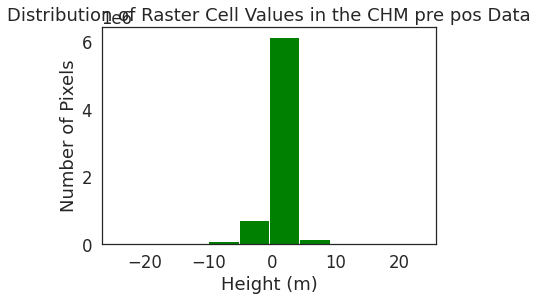

In [44]:
f, ax = plt.subplots()

(count, bin, _) = chm_pre_pos.plot.hist(color = 'green')

ax.set(title="Distribution of Raster Cell Values in the CHM pre pos Data",
       xlabel="Height (m)",
       ylabel="Number of Pixels")
plt.show()

In [45]:
# print count and bin
print(count)
print(bin)

[3.500000e+01 1.116000e+03 1.596200e+04 1.120190e+05 7.074720e+05
 6.129713e+06 1.642300e+05 2.464300e+04 2.417000e+03 1.210000e+02]
[-24.45996    -19.67097    -14.881983   -10.092993    -5.3040037
  -0.51501465   4.2739744    9.0629635   13.8519535   18.640942
  23.429932  ]


[Text(0, 0.5, 'Number of Pixels'),
 Text(0.5, 0, 'Height (m)'),
 Text(0.5, 1.0, 'Histogram with Custom Breaks ')]

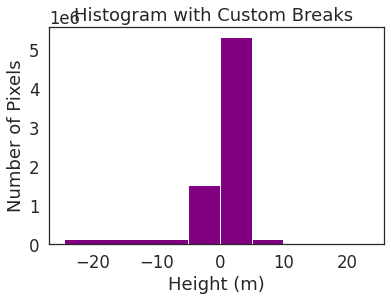

In [46]:
# Histogram with custom breaks
f, ax = plt.subplots()
chm_pre_pos.plot.hist(color="purple",
                           bins=[-24.45996, -5, 0, 5, 10, 23.42993])
                       

ax.set(title="Histogram with Custom Breaks ",
       xlabel="Height (m)",
       ylabel="Number of Pixels")

In [84]:
# print min and max values
data_min_value = np.nanmin(chm_pre_pos)
data_max_value = np.nanmax(chm_pre_pos)
print(data_min_value, data_max_value)

-24.45996 23.429932


In [190]:
# define class_bins

class_bins = [-np.inf, -10, 0, 10, np.inf]
class_bins

[-inf, -10, 0, 10, inf]

In [191]:
chm_pre_pos

<xarray.DataArray (y: 2000, x: 4000)>
array([[      nan,       nan,       nan, ...,  0.      ,  0.170044, -0.02002 ],
       [      nan,       nan,       nan, ...,  0.      ,  0.090088,  0.23999 ],
       [      nan,       nan,       nan, ...,  0.      ,  0.      ,  0.079956],
       ...,
       [      nan,       nan,       nan, ...,  0.      ,  0.      ,  0.      ],
       [      nan,       nan,       nan, ...,  0.      ,  0.      ,  0.      ],
       [      nan,       nan,       nan, ...,  0.      ,  0.      ,  0.      ]],
      dtype=float32)
Coordinates:
    band         int64 1
  * x            (x) float64 4.72e+05 4.72e+05 4.72e+05 ... 4.76e+05 4.76e+05
  * y            (y) float64 4.436e+06 4.436e+06 ... 4.434e+06 4.434e+06
    spatial_ref  int64 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0

In [192]:
# apply ufunc (pre_lidar_chm_pre = pp_lidar_chm_class)
pp_lidar_chm_class = xr.apply_ufunc(np.digitize,
                                     chm_pre_pos,
                                     class_bins)
pp_lidar_chm_class

<xarray.DataArray (y: 2000, x: 4000)>
array([[5, 5, 5, ..., 3, 3, 2],
       [5, 5, 5, ..., 3, 3, 3],
       [5, 5, 5, ..., 3, 3, 3],
       ...,
       [5, 5, 5, ..., 3, 3, 3],
       [5, 5, 5, ..., 3, 3, 3],
       [5, 5, 5, ..., 3, 3, 3]])
Coordinates:
    band         int64 1
  * x            (x) float64 4.72e+05 4.72e+05 4.72e+05 ... 4.76e+05 4.76e+05
  * y            (y) float64 4.436e+06 4.436e+06 ... 4.434e+06 4.434e+06
    spatial_ref  int64 0

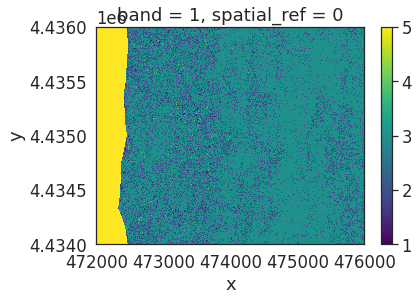

In [193]:
# Values of 5 represent missing data
im = pp_lidar_chm_class.plot.imshow()
ax.set_axis_off()

In [194]:
pp_lidar_chm_class

<xarray.DataArray (y: 2000, x: 4000)>
array([[5, 5, 5, ..., 3, 3, 2],
       [5, 5, 5, ..., 3, 3, 3],
       [5, 5, 5, ..., 3, 3, 3],
       ...,
       [5, 5, 5, ..., 3, 3, 3],
       [5, 5, 5, ..., 3, 3, 3],
       [5, 5, 5, ..., 3, 3, 3]])
Coordinates:
    band         int64 1
  * x            (x) float64 4.72e+05 4.72e+05 4.72e+05 ... 4.76e+05 4.76e+05
  * y            (y) float64 4.436e+06 4.436e+06 ... 4.434e+06 4.434e+06
    spatial_ref  int64 0

In [195]:
# Mask out values not equalt to 5
pre_lidar_chm_class_ma = pp_lidar_chm_class.where(pp_lidar_chm_class != 5)
pre_lidar_chm_class_ma

<xarray.DataArray (y: 2000, x: 4000)>
array([[nan, nan, nan, ...,  3.,  3.,  2.],
       [nan, nan, nan, ...,  3.,  3.,  3.],
       [nan, nan, nan, ...,  3.,  3.,  3.],
       ...,
       [nan, nan, nan, ...,  3.,  3.,  3.],
       [nan, nan, nan, ...,  3.,  3.,  3.],
       [nan, nan, nan, ...,  3.,  3.,  3.]])
Coordinates:
    band         int64 1
  * x            (x) float64 4.72e+05 4.72e+05 4.72e+05 ... 4.76e+05 4.76e+05
  * y            (y) float64 4.436e+06 4.436e+06 ... 4.434e+06 4.434e+06
    spatial_ref  int64 0

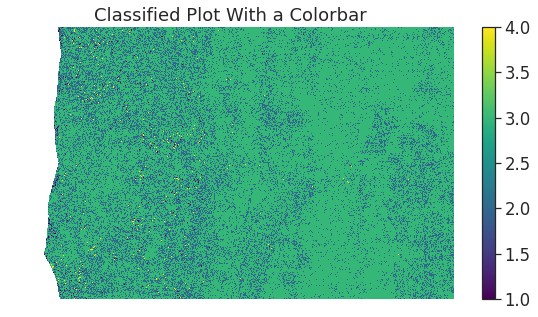

In [196]:
# Plot newly classified and masked raster
f, ax = plt.subplots(figsize=(10,5))

pre_lidar_chm_class_ma.plot.imshow()

ax.set(title="Classified Plot With a Colorbar")

ax.set_axis_off()
plt.show()

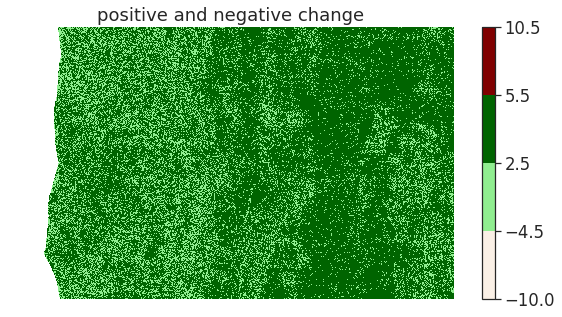

In [198]:
# Plot data using nicer colors
colors = ['linen', 'lightgreen', 'darkgreen', 'maroon']
class_bins = [-10, -4.5, 2.5, 5.5, 10.5]
cmap = ListedColormap(colors)
norm = BoundaryNorm(class_bins, len(colors))

# Plot newly classified and masked raster
f, ax = plt.subplots(figsize=(10, 5))

pre_lidar_chm_class_ma.plot.imshow(cmap=cmap,
                                   norm=norm)
ax.set(title="positive and negative change")
ax.set_axis_off()
plt.show()

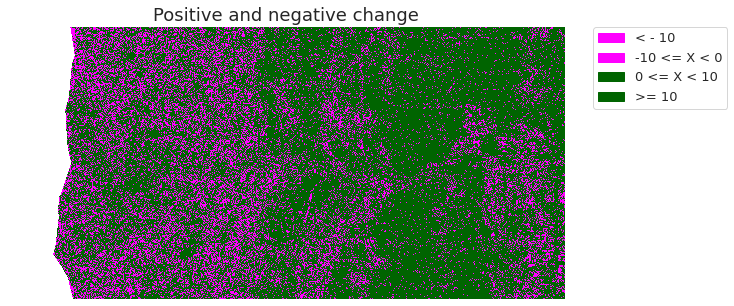

In [202]:
# Create a list of labels to use for your legend
height_classs_labels = ['< - 10',
                        '-10 <= X < 0',
                        '0 <= X < 10',
                        '>= 10']


# Create a colormap from a list of colors
colors = ['khaki', 'fuchsia', 'darkgreen', 'maroon']

# create ListedColormap
cmap = ListedColormap(colors)

# create class_bins
#class_bins = [-30,5,30]
class_bins = [-10, -4.5, 2.5, 5.5, 10.5]

# create BoundaryNorm
norm = BoundaryNorm(class_bins, len(colors))

# Plot newly classified and masked raster
f, ax = plt.subplots(figsize=(10, 5))

im = pre_lidar_chm_class_ma.plot.imshow(cmap = cmap,
                                        norm = norm,
                                        # Turn off colorbar
                                        add_colorbar = False)

# Add legend using earthpy
ep.draw_legend(im,
               titles = height_classs_labels)

ax.set(title="Positive and negative change")
ax.set_axis_off()
plt.show()